In [2]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [3]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 直方图

![title](image/hist_1.png)

#### cv2.calcHist(images,channels,mask,histSize,ranges)

- images: 原图像图像格式为 uint8 或 ﬂoat32。当传入函数时应 用中括号 [] 括起来例如[img]
- channels: 同样用中括号括起来，它会告函数我们统记整幅图像的直方图。如果传入图像是灰度图它的值就是 [0]如果是彩色图像 的传入的参数可以是 [0][1][2] 它们分别对应着 BGR。 
- mask: 掩模图像。统记整幅图像的直方图就把它为 None。但是如果你想统记图像某一部分的直方图的你就制作一个掩模图像并使用它。
- histSize:BIN 的数目。也应用中括号括起来
- ranges: 像素值范围常为 [0-256] 

In [4]:
img = cv2.imread('image/cat.jpg',0)   # 0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])   # 统计0到256每个像素值对应的像素点个数
hist.shape

(256, 1)

用matplotlib中的直方图来画


[153 157 162 ... 197 142 141]


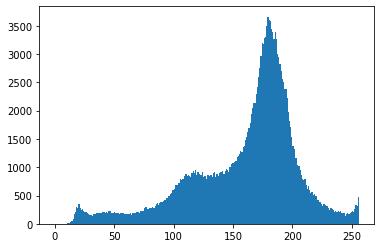

In [6]:

print(img.ravel())
plt.hist(img.ravel(),256,[0,256]);    # img.ravel() 扁平化操作, img的值会被修改，与此类似flatten（）也可实现扁平化操作，但不修改原值
plt.show()

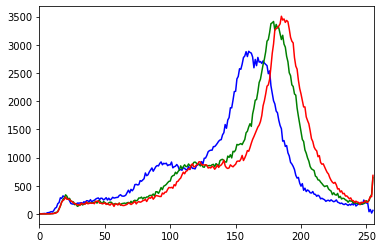

In [10]:
img = cv2.imread('image/cat.jpg') 
color = ('b','g','r')
for i,col in enumerate(color): 
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256])   # 设置x坐标的范围


mask操作

In [16]:
# 创建mast
mask = np.zeros(img.shape[:2], np.uint8)
print (mask.shape)
mask[100:300, 100:400] = 255
cv_show(mask,'mask')

(414, 500)


In [16]:
img = cv2.imread('image/cat.jpg', 0)
cv_show(img,'img')

In [17]:
masked_img = cv2.bitwise_and(img, img, mask=mask)#与操作
cv_show(masked_img,'masked_img')

In [18]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

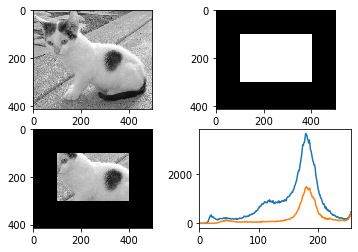

In [19]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

#### 直方图均衡化

![title](image/hist_2.png)

![title](image/hist_3.png)

![title](image/hist_4.png)

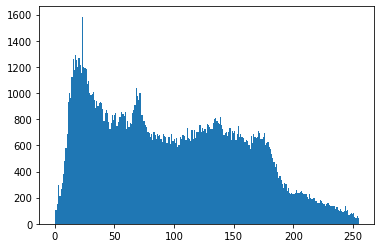

In [18]:
img = cv2.imread('image/clahe.jpg',0) #0表示灰度图 #clahe
plt.hist(img.ravel(),256); 
plt.show()

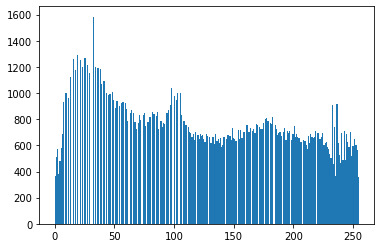

In [19]:
equ = cv2.equalizeHist(img) 
plt.hist(equ.ravel(),256)
plt.show()


In [21]:
res = np.hstack((img,equ))
cv_show(res,'res')

#### 自适应直方图均衡化

In [22]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 

In [23]:
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
cv_show(res,'res')

### 模板匹配


模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [24]:
# 模板匹配
img = cv2.imread('image/lena.jpg', 0)
template = cv2.imread('image/face.jpg', 0)
h, w = template.shape[:2] 

In [26]:
img.shape

(263, 263)

In [27]:
template.shape

(110, 85)

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关



公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [26]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [27]:
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
res.shape

(154, 179)

In [28]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)    # 返回的是x,y坐标

In [29]:
min_val

39168.0

In [30]:

max_val

74403584.0

In [31]:
min_loc

(107, 89)

In [32]:
max_loc

(159, 62)

4


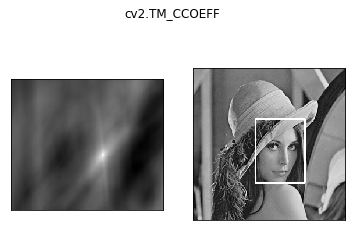

5


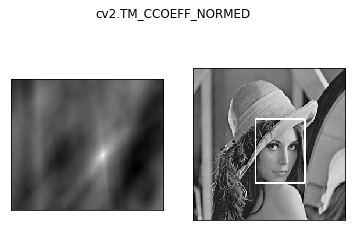

2


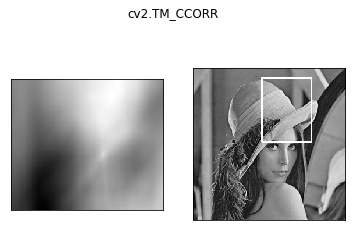

3


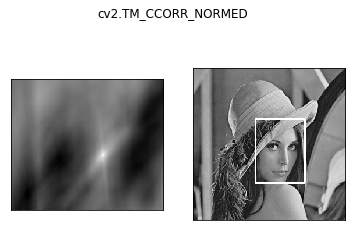

0


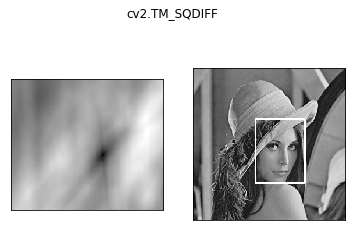

1


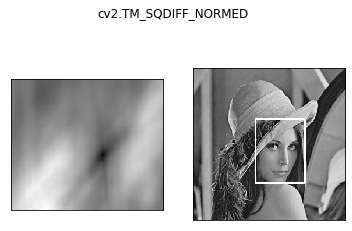

In [37]:
for meth in methods:
    img2 = img.copy()

    # 匹配方法的真值
    method = eval(meth)  # eval() 函数用来执行一个字符串表达式，并返回表达式的值。
    print (method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)    # 子图的标题
    plt.show()

### 匹配多个对象

In [38]:
img_rgb = cv2.imread('image/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('image/mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# 取匹配程度大于%80的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)

cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

32